In [1]:

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import plotly.express as px
from datetime import datetime, timedelta
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import cross_val_score
     
from sklearn.cluster import KMeans
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)


In [2]:
df = pd.read_csv(r'C:\Users\ferzi\python practice\Customer Segmentation using Clustering Algorithms in Python\Campaign_data.csv')
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1965  Graduation         Single  58138.0        0   
1      2174        1962  Graduation         Single  46344.0        1   
2      4141        1973  Graduation       Together  71613.0        0   
3      6182        1992  Graduation       Together  26646.0        1   
4      5324        1989         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1975  Graduation        Married  61223.0        0   
2236   4001        1954         PhD       Together  64014.0        2   
2237   7270        1989  Graduation       Divorced  56981.0        0   
2238   8235        1964      Master       Together  69245.0        0   
2239   9405        1962         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2020       58       635  ...                  7   
1            1  08-03-2022       38        11  ...                  5   
2            0  21-08-2021       26       426  ...                  4   
3            0  10-02-2022       26        11  ...                  6   
4            0  19-01-2022       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2021       46       709  ...                  5   
2236         1  10-06-2022       56       406  ...                  7   
2237         0  25-01-2022       91       908  ...                  6   
2238         1  24-01-2022        8       428  ...                  3   
2239         1  15-10-2020       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [3]:
#Exploring the dataset
# Set the display options to show all columns
pd.options.display.max_columns = None
print("Type:", type(df))
print("Dataframe shape is:", df.shape)
df.head()

Type: <class 'pandas.core.frame.DataFrame'>
Dataframe shape is: (2240, 29)


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1965  Graduation         Single  58138.0        0         0   
1  2174        1962  Graduation         Single  46344.0        1         1   
2  4141        1973  Graduation       Together  71613.0        0         0   
3  6182        1992  Graduation       Together  26646.0        1         0   
4  5324        1989         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2020       58       635         88              546              172   
1  08-03-2022       38        11          1                6                2   
2  21-08-2021       26       426         49              127              111   
3  10-02-2022       26        11          4               20               10   
4  19-01-2022       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [4]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1976.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1901.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1967.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1978.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1985.000000   68522.000000     1.000000     1.000000   
max    11191.000000  2004.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2240.000000   2240.000000  2240.000000         2240.0     2240.0   
mean       0.064286      0.013393     0.009375            3.0       11.0   
std        0.245316      0.114976     0.096391            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response  
count  2240.000000  
mean      0.149107  
std       0.356274  
min       0.000000  
25%       0.000000  
50%   

In [5]:
if df.duplicated().any():
    print('There are duplicate values: ', df.duplicated().sum())
else:
    print('No duplicates')
    
if df.isna().any().any():
    print('There are NaN values in the following columns in the DataFrame')
    print(df.isna().any(axis=0)[df.isna().any()], '\n')
else:
    print('There are no NaN values in the DataFrame\n')

No duplicates
There are NaN values in the following columns in the DataFrame
Income    True
dtype: bool 



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
df.dropna(inplace = True)
print("The total number of data-points after removing the rows with missing values are:", len(df))

The total number of data-points after removing the rows with missing values are: 2216


In [8]:
#Formatting date 
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [10]:
#     First, engineer non-categorical variables.

#     Rework categorical features - Marital status and Education.

#     Deal with multiple boolean features

#     Drop redundant features and rename existing features for convenience

#     Deal with outliers

In [11]:
df['Age'] = 2022 - df['Year_Birth']
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1965  Graduation         Single  58138.0        0   
1      2174        1962  Graduation         Single  46344.0        1   
2      4141        1973  Graduation       Together  71613.0        0   
3      6182        1992  Graduation       Together  26646.0        1   
4      5324        1989         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1975  Graduation        Married  61223.0        0   
2236   4001        1954         PhD       Together  64014.0        2   
2237   7270        1989  Graduation       Divorced  56981.0        0   
2238   8235        1964      Master       Together  69245.0        0   
2239   9405        1962         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  2020-09-04       58       635         88              546   
1            1  2022-03-08       38        11          1                6   
2            0  2021-08-21       26       426         49              127   
3            0  2022-02-10       26        11          4               20   
4            0  2022-01-19       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  2021-06-13       46       709         43              182   
2236         1  2022-06-10       56       406          0               30   
2237         0  2022-01-25       91       908         48              217   
2238         1  2022-01-24        8       428         30              214   
2239         1  2020-10-15       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

In [12]:
#Define age groups
def age_group(age):
    if 18 <= age <= 24:
        return 'Young Adults'
    elif 25 <= age <= 34:
        return 'Early Adulthood'
    elif 35 <= age <= 44:
        return 'Midlife'
    elif 45 <= age <= 54:
        return 'Middle Age'
    elif 55 <= age <= 64:
        return 'Pre-retirement'
    else:
        return 'Retirement Age'
    
# Create a new 'Age_Range' feature. 
df['Age_Range'] = df['Age'].apply(age_group)
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1965  Graduation         Single  58138.0        0   
1      2174        1962  Graduation         Single  46344.0        1   
2      4141        1973  Graduation       Together  71613.0        0   
3      6182        1992  Graduation       Together  26646.0        1   
4      5324        1989         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1975  Graduation        Married  61223.0        0   
2236   4001        1954         PhD       Together  64014.0        2   
2237   7270        1989  Graduation       Divorced  56981.0        0   
2238   8235        1964      Master       Together  69245.0        0   
2239   9405        1962         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  2020-09-04       58       635         88              546   
1            1  2022-03-08       38        11          1                6   
2            0  2021-08-21       26       426         49              127   
3            0  2022-02-10       26        11          4               20   
4            0  2022-01-19       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  2021-06-13       46       709         43              182   
2236         1  2022-06-10       56       406          0               30   
2237         0  2022-01-25       91       908         48              217   
2238         1  2022-01-24        8       428         30              214   
2239         1  2020-10-15       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

In [13]:
# To engineer the customer tenure feature in days, you need to:

#     Retrieve the 'Dt_Customer' column from the 'campaign_data' dataframe and assign it to the variable 'dt_customer'.

#     Define a variable 'dataset_date' representing a specific date (December 31, 2022).

#     Calculate the customer tenure for each customer by subtracting the 'dt_customer' from the 'dataset_date'.

#     Convert the customer tenure to days by dividing the calculated tenure by the number of days in a timedelta.

#     Assign the calculated customer tenure to a new column in the 'campaign_data' dataframe. 

#Customer tenure
dt_customer = df['Dt_Customer']
dataset_date = datetime(2022, 12, 31)
     
# Calculate the customer tenure for each customer
customer_tenure = dataset_date - dt_customer
     
# Convert the customer tenure to days
df['Customer_For'] = customer_tenure / np.timedelta64(1, 'D')
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1965  Graduation         Single  58138.0        0   
1      2174        1962  Graduation         Single  46344.0        1   
2      4141        1973  Graduation       Together  71613.0        0   
3      6182        1992  Graduation       Together  26646.0        1   
4      5324        1989         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1975  Graduation        Married  61223.0        0   
2236   4001        1954         PhD       Together  64014.0        2   
2237   7270        1989  Graduation       Divorced  56981.0        0   
2238   8235        1964      Master       Together  69245.0        0   
2239   9405        1962         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  2020-09-04       58       635         88              546   
1            1  2022-03-08       38        11          1                6   
2            0  2021-08-21       26       426         49              127   
3            0  2022-02-10       26        11          4               20   
4            0  2022-01-19       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  2021-06-13       46       709         43              182   
2236         1  2022-06-10       56       406          0               30   
2237         0  2022-01-25       91       908         48              217   
2238         1  2022-01-24        8       428         30              214   
2239         1  2020-10-15       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

In [14]:
# 1.4 Add Website conversion rate feature.

# Another helpful feature could be the Website conversion rate. To calculate it, you need to divide 
# NumWebPurchases by NumWebVisitsMonth. If the number of visits is zero, then the conversion rate should also be zero.

#Calculate WebConversionRate
df['WebConversionRate'] = np.where(df['NumWebVisitsMonth'] != 0, df['NumWebPurchases']/df['NumWebVisitsMonth'], 0)

df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1965  Graduation         Single  58138.0        0   
1      2174        1962  Graduation         Single  46344.0        1   
2      4141        1973  Graduation       Together  71613.0        0   
3      6182        1992  Graduation       Together  26646.0        1   
4      5324        1989         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1975  Graduation        Married  61223.0        0   
2236   4001        1954         PhD       Together  64014.0        2   
2237   7270        1989  Graduation       Divorced  56981.0        0   
2238   8235        1964      Master       Together  69245.0        0   
2239   9405        1962         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  2020-09-04       58       635         88              546   
1            1  2022-03-08       38        11          1                6   
2            0  2021-08-21       26       426         49              127   
3            0  2022-02-10       26        11          4               20   
4            0  2022-01-19       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  2021-06-13       46       709         43              182   
2236         1  2022-06-10       56       406          0               30   
2237         0  2022-01-25       91       908         48              217   
2238         1  2022-01-24        8       428         30              214   
2239         1  2020-10-15       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

In [15]:
# .5 Create Total_Spent feature
# The Total_Spentfeature represents the total amount of money a customer has spent over a certain period. It is helpful for customer segmentation as it could give an idea of the customer's overall spending habits and their value to the company.

# To create the total spent feature, you need to sum up all of the Mnt* features (e.g., MntWines, MntFruits, MntMeatProducts, etc.) that represent the amount spent on each type of product. You need to create a new column called "Total_Spent."


# Calculate the total spent for each customer
df['Total_Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df


ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1965  Graduation         Single  58138.0        0   
1      2174        1962  Graduation         Single  46344.0        1   
2      4141        1973  Graduation       Together  71613.0        0   
3      6182        1992  Graduation       Together  26646.0        1   
4      5324        1989         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1975  Graduation        Married  61223.0        0   
2236   4001        1954         PhD       Together  64014.0        2   
2237   7270        1989  Graduation       Divorced  56981.0        0   
2238   8235        1964      Master       Together  69245.0        0   
2239   9405        1962         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  2020-09-04       58       635         88              546   
1            1  2022-03-08       38        11          1                6   
2            0  2021-08-21       26       426         49              127   
3            0  2022-02-10       26        11          4               20   
4            0  2022-01-19       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  2021-06-13       46       709         43              182   
2236         1  2022-06-10       56       406          0               30   
2237         0  2022-01-25       91       908         48              217   
2238         1  2022-01-24        8       428         30              214   
2239         1  2020-10-15       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

In [16]:
# 1.6 The total number of purchases

# Creating a Total_Purchases feature during feature engineering can provide valuable insights into customer behavior, help with predictive modeling and segmentation. To do it, sum ['NumWebPurchases'], ['NumCatalogPurchases'] and ['NumStorePurchases'] features.


#Calculate total number of purchases
df['Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1965  Graduation         Single  58138.0        0   
1      2174        1962  Graduation         Single  46344.0        1   
2      4141        1973  Graduation       Together  71613.0        0   
3      6182        1992  Graduation       Together  26646.0        1   
4      5324        1989         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1975  Graduation        Married  61223.0        0   
2236   4001        1954         PhD       Together  64014.0        2   
2237   7270        1989  Graduation       Divorced  56981.0        0   
2238   8235        1964      Master       Together  69245.0        0   
2239   9405        1962         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  2020-09-04       58       635         88              546   
1            1  2022-03-08       38        11          1                6   
2            0  2021-08-21       26       426         49              127   
3            0  2022-02-10       26        11          4               20   
4            0  2022-01-19       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  2021-06-13       46       709         43              182   
2236         1  2022-06-10       56       406          0               30   
2237         0  2022-01-25       91       908         48              217   
2238         1  2022-01-24        8       428         30              214   
2239         1  2020-10-15       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

In [17]:
# In order to calculate this, you need to sum the number of adults in households with a number of dependents. 

# Check Marital_Status feature:


#Explore the Marital_Status feature
print("Total categories in the feature Marital_Status:\n", df["Marital_Status"].value_counts(), "\n")

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 



In [18]:
# To derive the number of adults in the household from marital status, you can use the Replace function. Replace "Married" 
# and "Together" with 2 and all other values with 1.
# To calculate the number of dependents, add the  Kidhome and  Teenhome features together.
# To calculate Household_Size, add the Adults  feature to the Dependents feature.
# To engineer the Is_Parent feature, set it equal to 1 if the number of Dependents is greater than 1, and 0 otherwise.

#Deriving number of adults in household by marital status
df["Adults"]=df["Marital_Status"].replace({"Married":2, "Together":2,"Single":1, "Divorced":1, "Widow":1, "Alone":1, "Absurd":1,  "YOLO":1})
     
#Feature indicating total dependents living in the household
df["Dependents"]=df["Kidhome"]+df["Teenhome"]
     
#Now you can calculate Household size 
df["Household_size"] = df["Adults"] + df["Dependents"]
     
#Feature pertaining parenthood
df["Is_Parent"] = np.where(df.Dependents> 0, 1, 0)

df


ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1965  Graduation         Single  58138.0        0   
1      2174        1962  Graduation         Single  46344.0        1   
2      4141        1973  Graduation       Together  71613.0        0   
3      6182        1992  Graduation       Together  26646.0        1   
4      5324        1989         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1975  Graduation        Married  61223.0        0   
2236   4001        1954         PhD       Together  64014.0        2   
2237   7270        1989  Graduation       Divorced  56981.0        0   
2238   8235        1964      Master       Together  69245.0        0   
2239   9405        1962         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  2020-09-04       58       635         88              546   
1            1  2022-03-08       38        11          1                6   
2            0  2021-08-21       26       426         49              127   
3            0  2022-02-10       26        11          4               20   
4            0  2022-01-19       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  2021-06-13       46       709         43              182   
2236         1  2022-06-10       56       406          0               30   
2237         0  2022-01-25       91       908         48              217   
2238         1  2022-01-24        8       428         30              214   
2239         1  2020-10-15       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

In [19]:
# Education

print("Total categories in the feature Education:\n", df["Education"].value_counts())

#Calculate the average income for each education category
avg_income_by_education = df.groupby('Education')['Income'].mean()
# Print the result
print(avg_income_by_education)

#Calculate the average spent for each education category
avg_spent_by_education = df.groupby('Education')['Total_Spent'].mean()
# Print the result
print(avg_spent_by_education)

#Updating category
df["Education"]=df["Education"].replace({"Graduation":"Postgraduate", "Master":"Postgraduate"})

df

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64
Education
2n Cycle      47633.190000
Basic         20306.259259
Graduation    52720.373656
Master        52917.534247
PhD           56145.313929
Name: Income, dtype: float64
Education
2n Cycle      494.930000
Basic          81.796296
Graduation    621.686380
Master        609.767123
PhD           676.733888
Name: Total_Spent, dtype: float64


ID  Year_Birth     Education Marital_Status   Income  Kidhome  \
0      5524        1965  Postgraduate         Single  58138.0        0   
1      2174        1962  Postgraduate         Single  46344.0        1   
2      4141        1973  Postgraduate       Together  71613.0        0   
3      6182        1992  Postgraduate       Together  26646.0        1   
4      5324        1989           PhD        Married  58293.0        1   
...     ...         ...           ...            ...      ...      ...   
2235  10870        1975  Postgraduate        Married  61223.0        0   
2236   4001        1954           PhD       Together  64014.0        2   
2237   7270        1989  Postgraduate       Divorced  56981.0        0   
2238   8235        1964  Postgraduate       Together  69245.0        0   
2239   9405        1962           PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  2020-09-04       58       635         88              546   
1            1  2022-03-08       38        11          1                6   
2            0  2021-08-21       26       426         49              127   
3            0  2022-02-10       26        11          4               20   
4            0  2022-01-19       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  2021-06-13       46       709         43              182   
2236         1  2022-06-10       56       406          0               30   
2237         0  2022-01-25       91       908         48              217   
2238         1  2022-01-24        8       428         30              214   
2239         1  2020-10-15       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235              

In [20]:
# Now, instead of having a boolean variable for each accepted campaign, let's have the variable Offers_Accepted


df["Offers_Accepted"] = df["AcceptedCmp1"] + df["AcceptedCmp2"] + df["AcceptedCmp3"] + df["AcceptedCmp4"] + df["AcceptedCmp5"] + df["Response"]

df

ID  Year_Birth     Education Marital_Status   Income  Kidhome  \
0      5524        1965  Postgraduate         Single  58138.0        0   
1      2174        1962  Postgraduate         Single  46344.0        1   
2      4141        1973  Postgraduate       Together  71613.0        0   
3      6182        1992  Postgraduate       Together  26646.0        1   
4      5324        1989           PhD        Married  58293.0        1   
...     ...         ...           ...            ...      ...      ...   
2235  10870        1975  Postgraduate        Married  61223.0        0   
2236   4001        1954           PhD       Together  64014.0        2   
2237   7270        1989  Postgraduate       Divorced  56981.0        0   
2238   8235        1964  Postgraduate       Together  69245.0        0   
2239   9405        1962           PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  2020-09-04       58       635         88              546   
1            1  2022-03-08       38        11          1                6   
2            0  2021-08-21       26       426         49              127   
3            0  2022-02-10       26        11          4               20   
4            0  2022-01-19       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  2021-06-13       46       709         43              182   
2236         1  2022-06-10       56       406          0               30   
2237         0  2022-01-25       91       908         48              217   
2238         1  2022-01-24        8       428         30              214   
2239         1  2020-10-15       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235              

In [21]:
# Drop redundant features

# Redundant features are "Marital_Status", "Dt_Customer", "Year_Birth", "ID", "Kidhome", "Teenhome"

# Reason - you either used them to engineer new features, or they do not add value to the solution.


#Use the function to_drop to get rid of them.
to_drop = ["Marital_Status", "Dt_Customer", "Year_Birth", "ID", "Kidhome", "Teenhome"]
df = df.drop(to_drop, axis=1)


# Rename features for clarity

# To rename features, use the "rename" function. 
# To rename the product categories, remove "Mnt" from the feature name. 
# For the campaigns, rename them to "Promo 1", "Promo 2", and so on, with "Promo 6" representing the last promo. 
# Simplify the names of the traffic source features. 
# For example, instead of using "NumWebPurchases", use "Web" to represent the feature.

df = df.rename(columns={"MntWines": "Wine",
                        "MntFruits":"Fruits",
                        "MntMeatProducts":"Meat",
                        "MntFishProducts":"Fish",
                        "MntSweetProducts":"Sweets",
                        "MntGoldProds":"Gold",
                        "AcceptedCmp1":"Promo1", 
                        "AcceptedCmp2":"Promo2", 
                        "AcceptedCmp3":"Promo3",
                        "AcceptedCmp4":"Promo4",
                        "AcceptedCmp5":"Promo5", 
                        "Response":"Promo6",
                        "NumCatalogPurchases":"Catalog",
                        "NumWebPurchases":"Web", 
                        "NumDealsPurchases":"DealsPurchases", 
                        "NumStorePurchases":"Store", 
                        "NumWebVisitsMonth":"WebVisits"})

df

Education   Income  Recency  Wine  Fruits  Meat  Fish  Sweets  Gold  \
0     Postgraduate  58138.0       58   635      88   546   172      88    88   
1     Postgraduate  46344.0       38    11       1     6     2       1     6   
2     Postgraduate  71613.0       26   426      49   127   111      21    42   
3     Postgraduate  26646.0       26    11       4    20    10       3     5   
4              PhD  58293.0       94   173      43   118    46      27    15   
...            ...      ...      ...   ...     ...   ...   ...     ...   ...   
2235  Postgraduate  61223.0       46   709      43   182    42     118   247   
2236           PhD  64014.0       56   406       0    30     0       0     8   
2237  Postgraduate  56981.0       91   908      48   217    32      12    24   
2238  Postgraduate  69245.0        8   428      30   214    80      30    61   
2239           PhD  52869.0       40    84       3    61     2       1    21   

      DealsPurchases  Web  Catalog  Store  WebVisits  Promo3  Promo4  Promo5  \
0                  3    8       10      4          7       0       0       0   
1                  2    1        1      2          5       0       0       0   
2                  1    8        2     10          4       0       0       0   
3                  2    2        0      4          6       0       0       0   
4                  5    5        3      6          5       0       0       0   
...              ...  ...      ...    ...        ...     ...     ...     ...   
2235               2    9        3      4          5       0       0       0   
2236               7    8        2      5          7       0       0       0   
2237               1    2        3     13          6       0       1       0   
2238               2    6        5     10          3       0       0       0   
2239               3    3        1      4          7       0       0       0   

      Promo1  Promo2  Complain  Z_CostContact  Z_Revenue  Promo6  Age  \
0          0       0         0              3         11       1   57   
1          0       0         0              3         11       0   60   
2          0       0         0              3         11       0   49   
3          0       0         0              3         11       0   30   
4          0       0         0              3         11       0   33   
...      ...     ...       ...            ...        ...     ...  ...   
2235       0       0         0              3         11       0   47   
2236       1       0         0              3         11       0   68   
2237       0       0         0              3         11       0   33   
2238       0       0         0              3         11       0   58   
2239       0       0         0              3         11       1   60   

            Age_Range  Customer_For  WebConversionRate  Total_Spent  \
0      Pre-retirement         848.0           1.142857         1617   
1      Pre-retirement         298.0           0.200000           27   
2          Middle Age         497.0           2.000000          776   
3     Early Adulthood         324.0           0.333333           53   
4     Early Adulthood         346.0           1.000000          422   
...               ...           ...                ...          ...   
2235       Middle Age         566.0           1.800000         1341   
2236   Retirement Age         204.0           1.142857          444   
2237  Early Adulthood         340.0           0.333333         1241   
2238   Pre-retirement         341.0           2.000000          843   
2239   Pre-retirement         807.0           0.428571          172   

      Total_Purchases  Adults  Dependents  Household_size  Is_Parent  \
0                  22       1           0               1          0   
1                   4       1           2               3          1   
2                  20       2           0               2          0   
3                   6       2           1               3          1 

In [22]:
# checking outliers
df.describe()

# Age and Income mean and max look weird

Income      Recency         Wine       Fruits         Meat  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354    49.012635   305.091606    26.356047   166.995939   
std     25173.076661    28.948352   337.327920    39.793917   224.283273   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000    24.000000    24.000000     2.000000    16.000000   
50%     51381.500000    49.000000   174.500000     8.000000    68.000000   
75%     68522.000000    74.000000   505.000000    33.000000   232.250000   
max    666666.000000    99.000000  1493.000000   199.000000  1725.000000   

              Fish       Sweets         Gold  DealsPurchases          Web  \
count  2216.000000  2216.000000  2216.000000     2216.000000  2216.000000   
mean     37.637635    27.028881    43.965253        2.323556     4.085289   
std      54.752082    41.072046    51.815414        1.923716     2.740951   
min       0.000000     0.000000     0.000000        0.000000     0.000000   
25%       3.000000     1.000000     9.000000        1.000000     2.000000   
50%      12.000000     8.000000    24.500000        2.000000     4.000000   
75%      50.000000    33.000000    56.000000        3.000000     6.000000   
max     259.000000   262.000000   321.000000       15.000000    27.000000   

           Catalog        Store    WebVisits       Promo3       Promo4  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean      2.671029     5.800993     5.319043     0.073556     0.074007   
std       2.926734     3.250785     2.425359     0.261106     0.261842   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     3.000000     3.000000     0.000000     0.000000   
50%       2.000000     5.000000     6.000000     0.000000     0.000000   
75%       4.000000     8.000000     7.000000     0.000000     0.000000   
max      28.000000    13.000000    20.000000     1.000000     1.000000   

            Promo5       Promo1       Promo2     Complain  Z_CostContact  \
count  2216.000000  2216.000000  2216.000000  2216.000000         2216.0   
mean      0.073105     0.064079     0.013538     0.009477            3.0   
std       0.260367     0.244950     0.115588     0.096907            0.0   
min       0.000000     0.000000     0.000000     0.000000            3.0   
25%       0.000000     0.000000     0.000000     0.000000            3.0   
50%       0.000000     0.000000     0.000000     0.000000            3.0   
75%       0.000000     0.000000     0.000000     0.000000            3.0   
max       1.000000     1.000000     1.000000     1.000000            3.0   

       Z_Revenue       Promo6          Age  Customer_For  WebConversionRate  \
count     2216.0  2216.000000  2216.000000   2216.000000        2216.000000   
mean        11.0     0.150271    45.179603    538.521209           1.077581   
std          0.0     0.357417    11.985554    202.434667           1.212385   
min         11.0     0.000000    18.000000    185.000000           0.000000   
25%         11.0     0.000000    37.000000    365.000000           0.333333   
50%         11.0     0.000000    44.000000    540.500000           0.750000   
75%         11.0     0.000000    55.000000    714.000000           1.500000   
max         11.0     1.000000   121.000000    884.000000          27.000000   

       Total_Spent  Total_Purchases       Adults   Dependents  Household_size  \
count  2216.000000      2216.000000  2216.000000  2216.000000     2216.000000   
mean    607.075361        12.557310     1.645307     0.947202        2.592509   
std     602.900476         7.204611     0.478528     0.749062        0.905722   
min       5.000000         0.000000     1.000000     0.000000        1.000000   
25%      69.000000         6.000000     1.000000     0.000000        2.000000   
50%     396.500000        12.000000     2.000000     1.000000        3.000000   
75% 

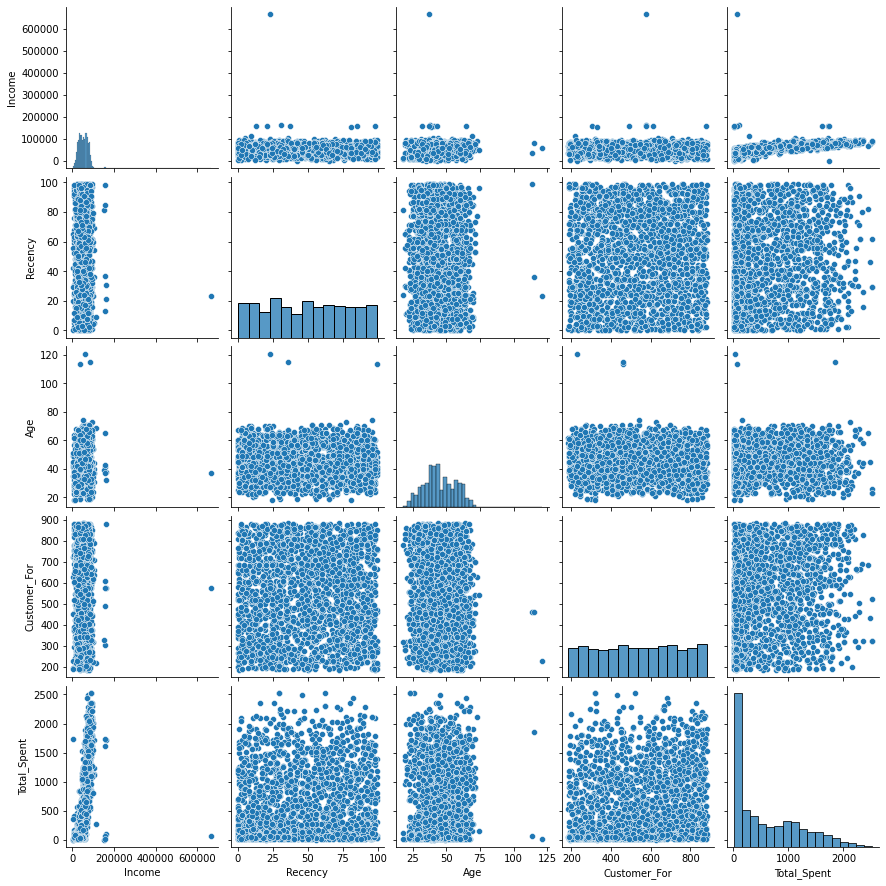

In [23]:
# Do quick visual data exploration

#Select columns to plot
selected_columns = df[["Income", "Recency", "Age", "Customer_For", "Total_Spent"]]
     
# Create a pairplot using Seaborn with a visually appealing color palette
sns.pairplot(selected_columns)
     
# Display the plot using matplotlib.pyplot
plt.show()

It is clear now that you have outliers in Age and Income features. Remove them, applying appropriate filters. In this case, it is less than 100 for Age  and less than 200.000 for the Income.

In [24]:
# 5.3 Remove outliers
#Dropping the outliers by setting a cap on Age and income. 
df = df[(df["Age"]<100)]
df = df[(df["Income"]<200000)]
print("The total number of data-points after removing the outliers are:", len(df))
df

The total number of data-points after removing the outliers are: 2212


Education   Income  Recency  Wine  Fruits  Meat  Fish  Sweets  Gold  \
0     Postgraduate  58138.0       58   635      88   546   172      88    88   
1     Postgraduate  46344.0       38    11       1     6     2       1     6   
2     Postgraduate  71613.0       26   426      49   127   111      21    42   
3     Postgraduate  26646.0       26    11       4    20    10       3     5   
4              PhD  58293.0       94   173      43   118    46      27    15   
...            ...      ...      ...   ...     ...   ...   ...     ...   ...   
2235  Postgraduate  61223.0       46   709      43   182    42     118   247   
2236           PhD  64014.0       56   406       0    30     0       0     8   
2237  Postgraduate  56981.0       91   908      48   217    32      12    24   
2238  Postgraduate  69245.0        8   428      30   214    80      30    61   
2239           PhD  52869.0       40    84       3    61     2       1    21   

      DealsPurchases  Web  Catalog  Store  WebVisits  Promo3  Promo4  Promo5  \
0                  3    8       10      4          7       0       0       0   
1                  2    1        1      2          5       0       0       0   
2                  1    8        2     10          4       0       0       0   
3                  2    2        0      4          6       0       0       0   
4                  5    5        3      6          5       0       0       0   
...              ...  ...      ...    ...        ...     ...     ...     ...   
2235               2    9        3      4          5       0       0       0   
2236               7    8        2      5          7       0       0       0   
2237               1    2        3     13          6       0       1       0   
2238               2    6        5     10          3       0       0       0   
2239               3    3        1      4          7       0       0       0   

      Promo1  Promo2  Complain  Z_CostContact  Z_Revenue  Promo6  Age  \
0          0       0         0              3         11       1   57   
1          0       0         0              3         11       0   60   
2          0       0         0              3         11       0   49   
3          0       0         0              3         11       0   30   
4          0       0         0              3         11       0   33   
...      ...     ...       ...            ...        ...     ...  ...   
2235       0       0         0              3         11       0   47   
2236       1       0         0              3         11       0   68   
2237       0       0         0              3         11       0   33   
2238       0       0         0              3         11       0   58   
2239       0       0         0              3         11       1   60   

            Age_Range  Customer_For  WebConversionRate  Total_Spent  \
0      Pre-retirement         848.0           1.142857         1617   
1      Pre-retirement         298.0           0.200000           27   
2          Middle Age         497.0           2.000000          776   
3     Early Adulthood         324.0           0.333333           53   
4     Early Adulthood         346.0           1.000000          422   
...               ...           ...                ...          ...   
2235       Middle Age         566.0           1.800000         1341   
2236   Retirement Age         204.0           1.142857          444   
2237  Early Adulthood         340.0           0.333333         1241   
2238   Pre-retirement         341.0           2.000000          843   
2239   Pre-retirement         807.0           0.428571          172   

      Total_Purchases  Adults  Dependents  Household_size  Is_Parent  \
0                  22       1           0               1          0   
1                   4       1           2               3          1   
2                  20       2           0               2          0   
3                   6       2           1               3          1 

Data preprocessing

Excellent work on the previous tasks! Now, it's time to preprocess the data. You will define the features to use for clustering and scale the data. To complete this task, perform the following steps:


    Define the features to use for clustering.

    Scale the data.

Make sure to visualize the distribution of each feature and apply the appropriate scaling method for Gaussian and non-Gaussian features. Goal for this task - you should have a dataframe ready for clustering. 

In [25]:
# Drop non-numeric columns

numeric_data = df.select_dtypes(include=np.number)

# Drop columns that were summarized during the Feature Engineering step.

# Why is this essential here? First, because one of your main focuses is interpretability, 
# second, summarized features will have a high correlation with cumulative features.
to_drop1 = ['Promo1', 'Promo2', 'Promo3', 'Promo4', 'Promo5', 'Promo6', 'Wine', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Web', 'Catalog', 'Store']
numeric_data = numeric_data.drop(to_drop1, axis=1)

numeric_data


Income  Recency  DealsPurchases  WebVisits  Complain  Z_CostContact  \
0     58138.0       58               3          7         0              3   
1     46344.0       38               2          5         0              3   
2     71613.0       26               1          4         0              3   
3     26646.0       26               2          6         0              3   
4     58293.0       94               5          5         0              3   
...       ...      ...             ...        ...       ...            ...   
2235  61223.0       46               2          5         0              3   
2236  64014.0       56               7          7         0              3   
2237  56981.0       91               1          6         0              3   
2238  69245.0        8               2          3         0              3   
2239  52869.0       40               3          7         0              3   

      Z_Revenue  Age  Customer_For  WebConversionRate  Total_Spent  \
0            11   57         848.0           1.142857         1617   
1            11   60         298.0           0.200000           27   
2            11   49         497.0           2.000000          776   
3            11   30         324.0           0.333333           53   
4            11   33         346.0           1.000000          422   
...         ...  ...           ...                ...          ...   
2235         11   47         566.0           1.800000         1341   
2236         11   68         204.0           1.142857          444   
2237         11   33         340.0           0.333333         1241   
2238         11   58         341.0           2.000000          843   
2239         11   60         807.0           0.428571          172   

      Total_Purchases  Adults  Dependents  Household_size  Is_Parent  \
0                  22       1           0               1          0   
1                   4       1           2               3          1   
2                  20       2           0               2          0   
3                   6       2           1               3          1   
4                  14       2           1               3          1   
...               ...     ...         ...             ...        ...   
2235               16       2           1               3          1   
2236               15       2           3               5          1   
2237               18       1           0               1          0   
2238               21       2           1               3          1   
2239                8       2           2               4          1   

      Offers_Accepted  
0                   1  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
2235                0  
2236                1  
2237                1  
2238                0  
2239                1  

[2212 rows x 17 columns]

In [26]:
# Calculate the top features affecting the number of accepted promotions

# Keep in mind that this is a supervised feature selection method.  It works very well in this case because: 

# It allows you to focus on the most essential features in your dataset, 
# as determined by their mutual information with the target variable, 'Offers_Accepted'.

# A reduced feature set makes it easier to interpret and understand the resulting clusters as 
# patterns and relationships among them become more apparent

# Target variable (Offers_Accepted)  adequately represents the underlying structure of the data.

from sklearn.feature_selection import SelectKBest, mutual_info_classif
     
X = numeric_data.drop('Offers_Accepted', axis=1)
y = numeric_data['Offers_Accepted']
     
num_top_features = 5
selector = SelectKBest(mutual_info_classif, k=num_top_features)
selector.fit(X, y)
     
selected_features = X.columns[selector.get_support()]
print(f"Top {num_top_features} features based on mutual information:")
print(selected_features)

Top 5 features based on mutual information:
Index(['Income', 'Customer_For', 'WebConversionRate', 'Total_Spent',
       'Total_Purchases'],
      dtype='object')


In [27]:
# Select features for scaling
campaign_data_scale = numeric_data[['Income', 'Customer_For', 'Total_Purchases', 'WebConversionRate', 'Total_Spent', 'Offers_Accepted']]


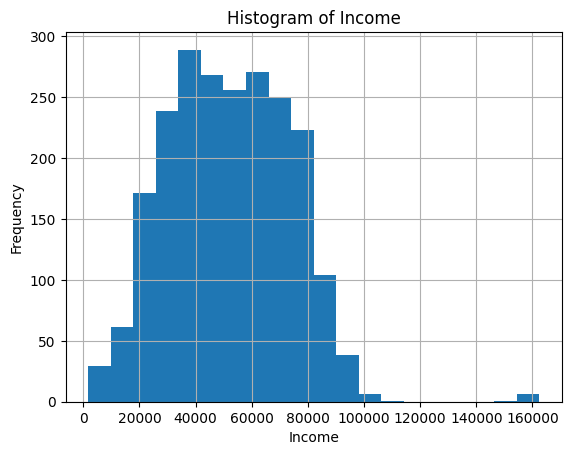

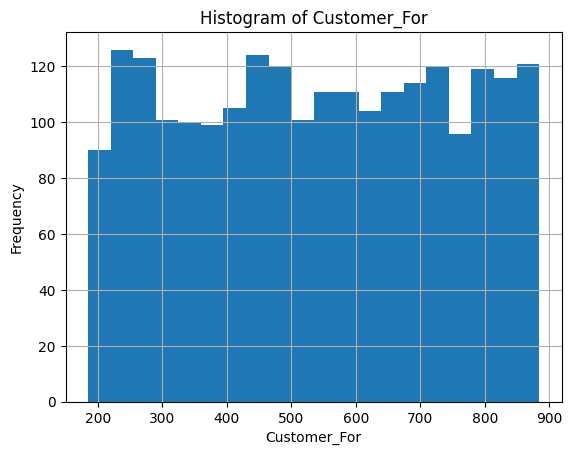

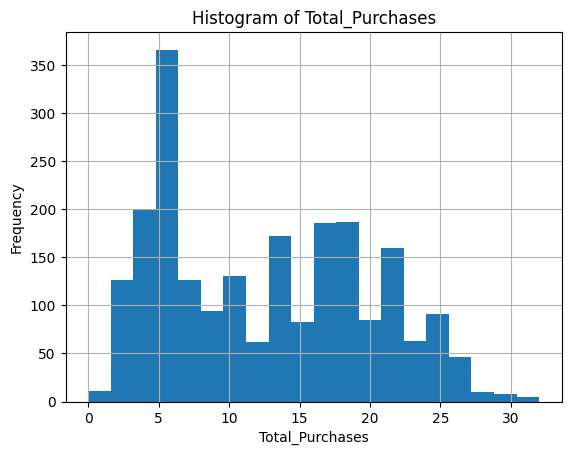

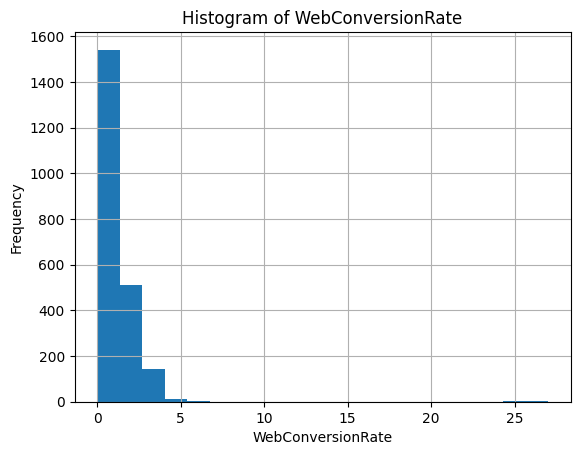

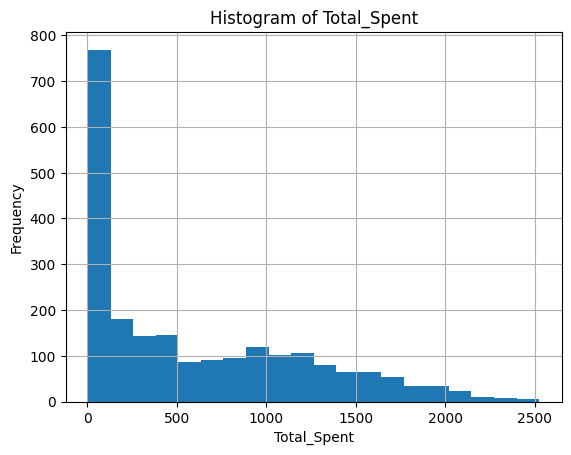

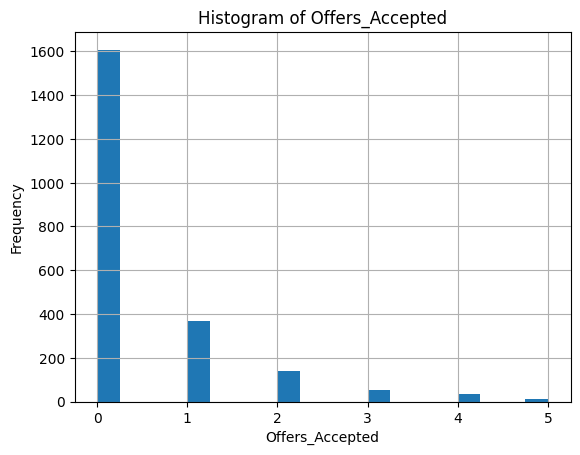

In [28]:
# Scale the data
# StandardScaler assumes that the data is normally distributed and scales it by centering it around the mean 
# and scaling it based on the standard deviation. MinMaxScaler, on the other hand, works well for data that is not 
# normally distributed, as it scales the data based on the minimum and maximum values. By checking the distribution of your 
# features, you can make an informed decision about which scaling method is most appropriate.

# Visualize the distribution of each feature
for column in campaign_data_scale.columns:
    plt.figure()
    campaign_data_scale[column].hist(bins=20)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [29]:
# Create lists of Gaussian and non-Gaussian features
# Looking at the chart above, it is clear what features have Gaussian distribution and what do not.

gaussian_features = ['Income']
non_gaussian_features = ['Customer_For', 'Total_Purchases', 'Total_Spent', 'Offers_Accepted', 'WebConversionRate']

# Create transformers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
     
preprocessor = ColumnTransformer(transformers=
                                 [('standard_scaler', StandardScaler(), gaussian_features),
                                  ('minmax_scaler', MinMaxScaler(), non_gaussian_features)], 
                                 remainder='passthrough')


# Fit and transform the numerical data
campaign_data_scaled = preprocessor.fit_transform(campaign_data_scale)

# Convert the scaled_numeric_data array to a DataFrame
campaign_data_scaled = pd.DataFrame(campaign_data_scaled, columns=gaussian_features + non_gaussian_features)

# Check the results
campaign_data_scaled.describe()

Income  Customer_For  Total_Purchases  Total_Spent  \
count  2.212000e+03   2212.000000      2212.000000  2212.000000   
mean  -1.146141e-16      0.506029         0.392716     0.238995   
std    1.000226e+00      0.289692         0.225170     0.239093   
min   -2.333791e+00      0.000000         0.000000     0.000000   
25%   -7.771113e-01      0.257511         0.187500     0.025397   
50%   -2.731156e-02      0.509299         0.375000     0.155556   
75%    7.679525e-01      0.756795         0.570312     0.413889   
max    5.131311e+00      1.000000         1.000000     1.000000   

       Offers_Accepted  WebConversionRate  
count      2212.000000        2212.000000  
mean          0.089783           0.039896  
std           0.178603           0.044875  
min           0.000000           0.000000  
25%           0.000000           0.012346  
50%           0.000000           0.027778  
75%           0.200000           0.055556  
max           1.000000           1.000000

Clustering

Now that the data is cleaned and preprocessed, you need to find the optimal number of clusters, perform clustering using the K-means algorithm, and add the cluster assignments as a new column in the original dataframe. The outcome of this task should be dataframe and a CSV file containing the original data with an additional column for the cluster assignments.

In [30]:
from yellowbrick.cluster import KElbowVisualizer

Elbow Method to determine the number of clusters to be formed:


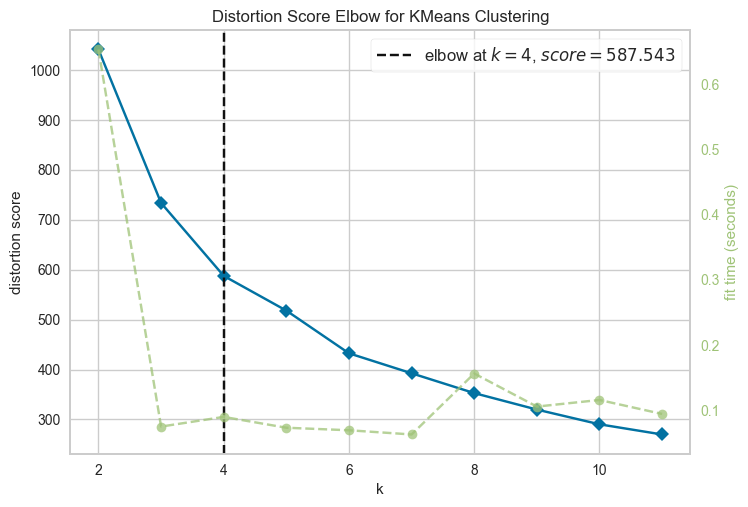

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
# Finding the optimal number of clusters

# First, use the Elbow Method to determine the number of clusters to be formed. 
# To do this, you must create an Elbow Method visualizer, fit it with the scaled data, and then display the resulting chart.


# Quick examination of elbow method to find the number of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=11)
Elbow_M.fit(campaign_data_scaled)
Elbow_M.show()


In [32]:
# Clustering using the K-means algorithm
# Now, you'll perform clustering using the K-means algorithm. 
# First, set the number of clusters and the random seed for reproducibility. 
# Then, initialize the KMeans model, fit it with the scaled data, and obtain the cluster assignments for each data point.

# Number of clusters
num_clusters = 5
     
# Set a seed for reproducibility
random_seed = 18
     
# Initialize the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=random_seed)
     
# Fit the model to the data
kmeans.fit(campaign_data_scaled)
     
# Get the cluster assignments for each data point
clusters = kmeans.predict(campaign_data_scaled)

In [34]:
# Add the cluster assignments as a new column in the original dataframe
# Finally, add the cluster assignments to the original dataframe as a new column and save the dataframe as a CSV file:

# Add the cluster assignments as a new column in the original dataframe
df["cluster"] = clusters
     
# Save dataframe as csv
df.to_csv('data_clustered.csv', index=False)

In this task, you will evaluate the model by assessing the distribution of clusters in 3D and 2D spaces, plotting the count of clusters, and considering whether you should keep all clusters for profiling steps. The goal is to visualize and analyze the resulting clusters to ensure they are well distributed and can be effectively used for customer segmentation.

In [35]:
# Assessment of clusters distribution in 3D space
# Create a colormap and visualize the clusters in 3D space by plotting a scatterplot using the 'Income', 'Customer_For', and 'Total_Spent' features:

# Create a colormap
mycolormap = ["#F57C00", "#1976D2", "#E53935", "#43A047", "#8E24AA"]
     
# Create a custom color sequence for the clusters
color_sequence = px.colors.qualitative.Plotly[:len(df['cluster'].unique())]
colormap = mycolormap
     
fig = px.scatter_3d(df, x='Income', y='Customer_For', z='Total_Spent',
                        color='cluster', color_discrete_map=colormap,
                        opacity=1, height=800, width=800)
     
fig.update_traces(marker=dict(size=6, line=dict(width=1)), selector=dict(mode='markers'))
     
fig.update_layout(scene=dict(xaxis_title='Income', xaxis_title_font=dict(color='black'),
                                 yaxis_title='Customer_For', yaxis_title_font=dict(color='black'),
                                 zaxis_title='Total_Spent', zaxis_title_font=dict(color='black')),
                      title='The Plot of the Clusters',
                      font=dict(family="Gilroy", color='black', size=12))
     
fig.show()

Clusters are beautifully distributed in 3D space. In this case, a visual inspection should be enough—no need to use Within-cluster Sum of Squares (WSS) or Silhouette Score.

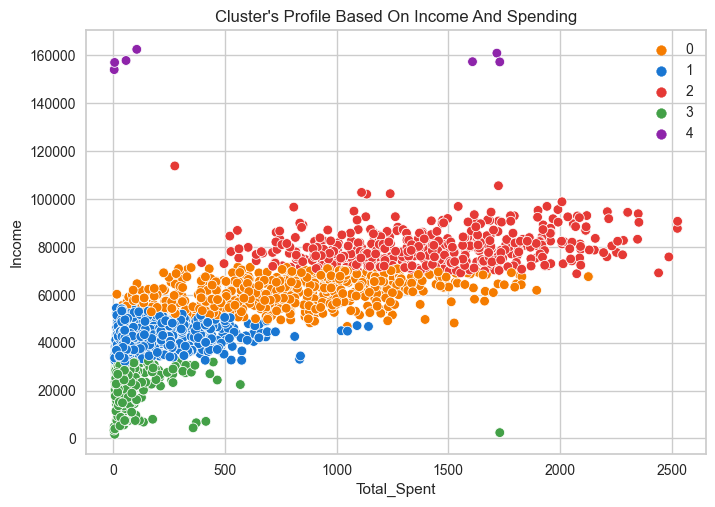

In [37]:
# Clusters assessment in 2D space by Income and Total Spent
# Visualize the clusters in 2D space using a scatterplot of 'Income' and 'Total_Spent':

pl = sns.scatterplot(data = df, x = df["Total_Spent"], y = df["Income"], hue = df["cluster"], palette = mycolormap)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

This chart confirms what you saw on the 3D plot. Clusters are very well distributed. Give a closer assessment of cluster 4 in the next step.

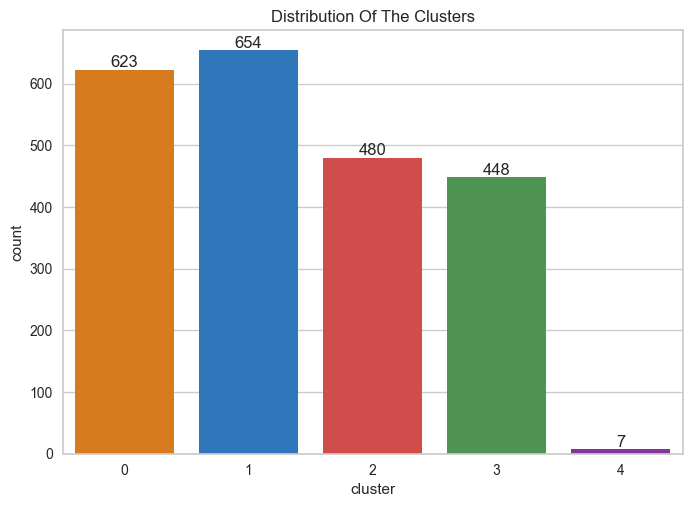

In [38]:
# Plot a countplot of the clusters and add value labels to the bars:
pal = mycolormap
pl = sns.countplot(x = df["cluster"], palette=pal)
pl.set_title("Distribution Of The Clusters")
# Add value labels to the bars
for i in pl.patches:
    pl.annotate(i.get_height(), (i.get_x() + i.get_width()/2, i.get_height()), ha='center', va='bottom', fontsize=12)
plt.show()

The clusters are evenly distributed, except for cluster 4, which is better to filter out. Based on the chart above, this cluster provides no valuable information for the marketing team. The group only contains seven clients, and despite their high income, their spending is unevenly distributed.

In [39]:
# Remove cluster number 4 from the dataframe and update the colormap:
# Drop cluster number 4
df.drop(df[df["cluster"] == 4].index, inplace=True)
# Update the palette
mycolormap = ["#F57C00", "#1976D2", "#E53935", "#43A047"]

After completing these steps, the resulting dataframe will have cluster number 4 removed, and the colormap will be updated accordingly. You can now proceed to the next step. 

Profiling - Behavioral analysis

Your objective is to examine various features that can characterize customer behavior. The primary aim is to comprehend the behavioral tendencies of customers who are more inclined to accept promotional campaigns. Understand their preferences, purchasing patterns, spending habits, the products they find most appealing, and their preferred purchase channels. Additionally, identify the types of promotions that elicit the best responses from them, their satisfaction level with the store's services, the frequency with which they visit the store's website, how often they are coming to the store, and for how long they have been store's clients and their online purchasing habits. For each behavioral feature, create a chart and provide insights derived from the analysis.
You should make the following charts and offer insights for the marketing team: 


    Offers accepted by each cluster.

    Number of purchases made by each cluster insights.

    Percentage of purchases made through campaign offers.

    Number of deals purchased with a discount.

    Percentage of purchases made with discounts for each cluster.

    Total spent by each cluster.

    Percentage spent for each cluster from the total spent in the store.

    Average spent per purchase by cluster.

    Percentage of purchases for each cluster by the place of purchase.

    Average number of web visits per month for each cluster.

    Average web conversion rate for each cluster.

    Spending by cluster for each category.

    Number of accepted promo campaigns by each cluster.

    Complains raised by each cluster.

    Recency distribution by each cluster.

    Customer tenure. 


Don't use loops to create charts. Go one by one and write insights for every chart.

Good luck. This is the most essential  and laborious task.




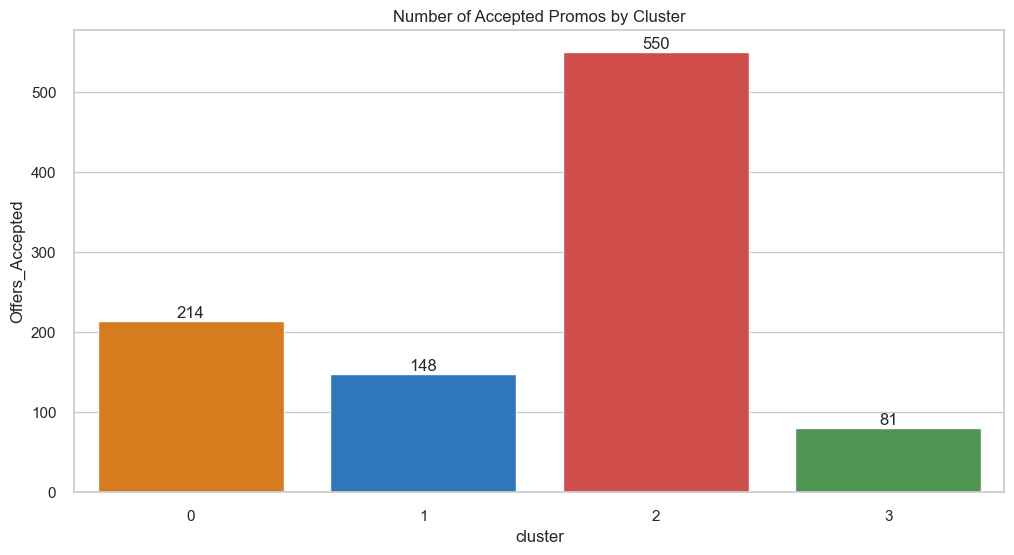

In [40]:
# Example approach
# In this task, you should visualize every feature that helps to understand customers' behavior and derive insights later on. 
# Without further ado, please proceed.
# Don't use loops to create visualizations for this task. 
# To make the process more structured and meaningful, create chart by chart and write insights for every chart.


# 1. Offers accepted by each cluster
# Create a barplot

# Aggregate the data by cluster and sum the Offers_Accepted column
agg_data = df.groupby('cluster')['Offers_Accepted'].sum().reset_index()
     
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="cluster", y="Offers_Accepted", data=agg_data, palette=mycolormap)
ax.set_title("Number of Accepted Promos by Cluster")
     
# Add labels to the bars
for i, row in agg_data.iterrows():
    ax.annotate(f"{row['Offers_Accepted']}", (i, row['Offers_Accepted']), ha='center', va='bottom', fontsize=12)
     
plt.show()

In [41]:
# Print percentage spent from the total for each cluster

# Calculate the total number of accepted offers for all clusters
total_accepted_offers = agg_data['Offers_Accepted'].sum()
     
# Calculate the percentage of offers accepted by each cluster
agg_data['Acceptance_Percentage'] = (agg_data['Offers_Accepted'] / total_accepted_offers) * 100
     
# Display the results
print("Percentage of Accepted Offers by Cluster:")
for index, row in agg_data.iterrows():
    print(f"Cluster {row['cluster']}: {row['Acceptance_Percentage']:.2f}%")

Percentage of Accepted Offers by Cluster:
Cluster 0.0: 21.55%
Cluster 1.0: 14.90%
Cluster 2.0: 55.39%
Cluster 3.0: 8.16%


Insights: Offers accepted by each cluster

Cluster 2 has the highest number of accepted offers (561) - 56.5% of total accepted proposals, indicating that it is the primary target group for the marketing team. The marketing team should tailor their promotional strategies to better target customers in Cluster 1. However, different approaches may be necessary for engaging with customers in Cluster 0. Additionally, this chart suggests that the clustering technique was chosen correctly since there is a defined group with the highest number of accepted promo campaigns. 

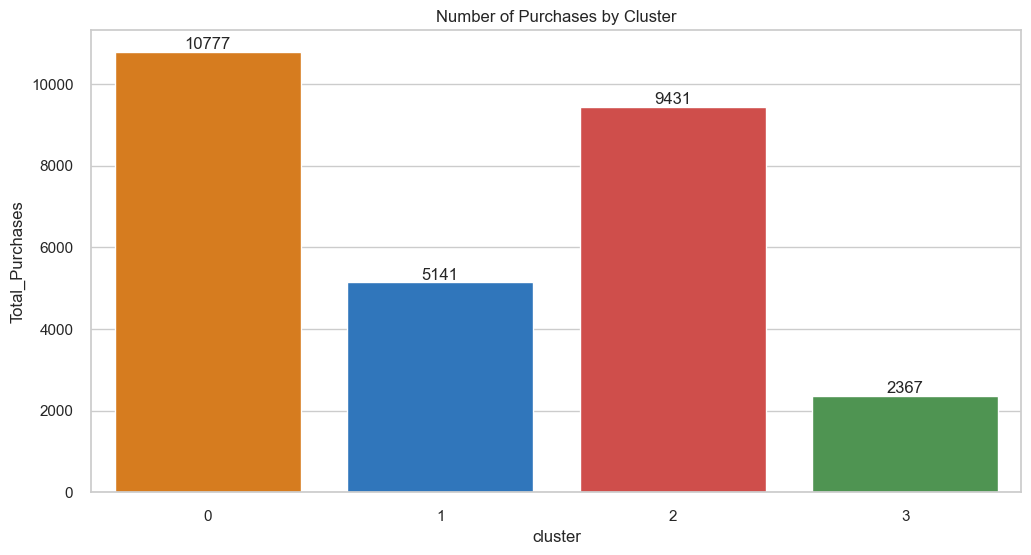

In [42]:
# Number of purchases made by each cluster
# Create a barplot
# Aggregate the data by cluster and sum the Offers_Accepted column
agg_data = df.groupby('cluster')['Total_Purchases'].sum().reset_index()
     
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="cluster", y="Total_Purchases", data=agg_data, palette=mycolormap)
ax.set_title("Number of Purchases by Cluster")
     
# Add labels to the bars
for i, row in agg_data.iterrows():
    ax.annotate(f"{row['Total_Purchases']}", (i, row['Total_Purchases']), ha='center', va='bottom', fontsize=12)
     
plt.show()

Insights: Number of purchases made by each cluster

Cluster 0 has the highest number of purchases (10,777), making it the most significant customer segment regarding transaction volume. It is followed by cluster number 2 with 9,431 purchases. 

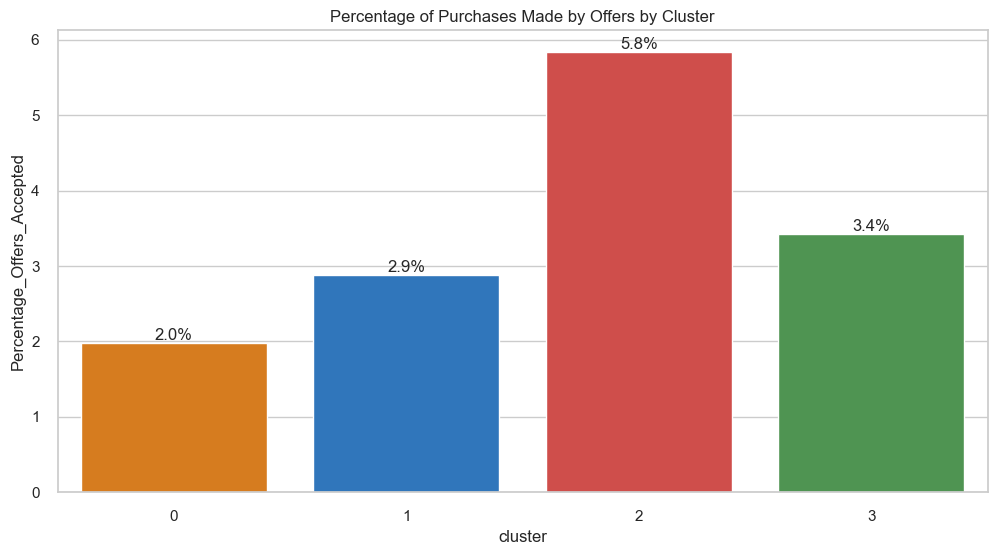

In [43]:
# Percentage of purchases made through campaign offers
# Create a barplot

# Aggregate the data by cluster and sum the Offers_Accepted and Total_Purchases columns
agg_data = df.groupby('cluster')[['Offers_Accepted', 'Total_Purchases']].sum().reset_index()
     
# Calculate the percentage of purchases made by offers for each cluster
agg_data['Percentage_Offers_Accepted'] = (agg_data['Offers_Accepted'] / agg_data['Total_Purchases']) * 100
     
# Create the barplot with percentage of purchases made by offers for each cluster
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="cluster", y="Percentage_Offers_Accepted", data=agg_data, palette=mycolormap)
ax.set_title("Percentage of Purchases Made by Offers by Cluster")
     
for i, row in agg_data.iterrows():
    label = "{:.1f}%".format(row['Percentage_Offers_Accepted']) # format label as percentage with 1 decimal place
    ax.annotate(label, (i, row['Percentage_Offers_Accepted']), ha='center', va='bottom', fontsize=12)
     
plt.show()

Insights: Percentage of purchases made through the campaign offers

Cluster 2 has the highest percentage of purchases made by offers (5.8%), indicating that customers in this segment are more inclined to buy products when offered promotions. The marketing team should emphasize promotional campaigns for customers in Cluster 1.

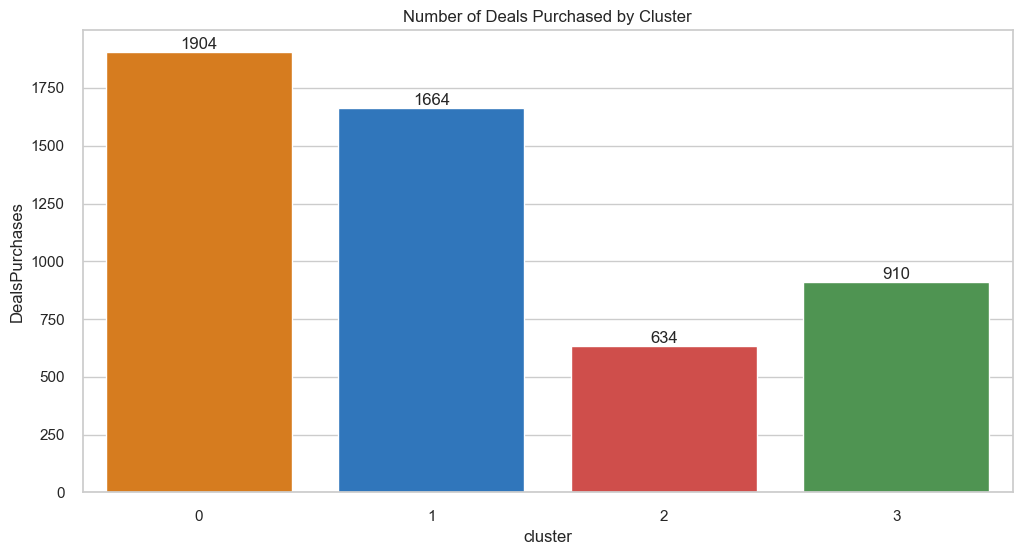

In [44]:
# Number of deals purchased with a discount
# Create a barplot

# Aggregate the data by cluster and sum the Deals Purchases column
agg_data = df.groupby('cluster')['DealsPurchases'].sum().reset_index()
     
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="cluster", y="DealsPurchases", data=agg_data, palette=mycolormap)
ax.set_title("Number of Deals Purchased by Cluster")
     
# Add labels to the bars
for i, row in agg_data.iterrows():
    ax.annotate(f"{row['DealsPurchases']}", (i, row['DealsPurchases']), ha='center', va='bottom', fontsize=12)
     
plt.show()

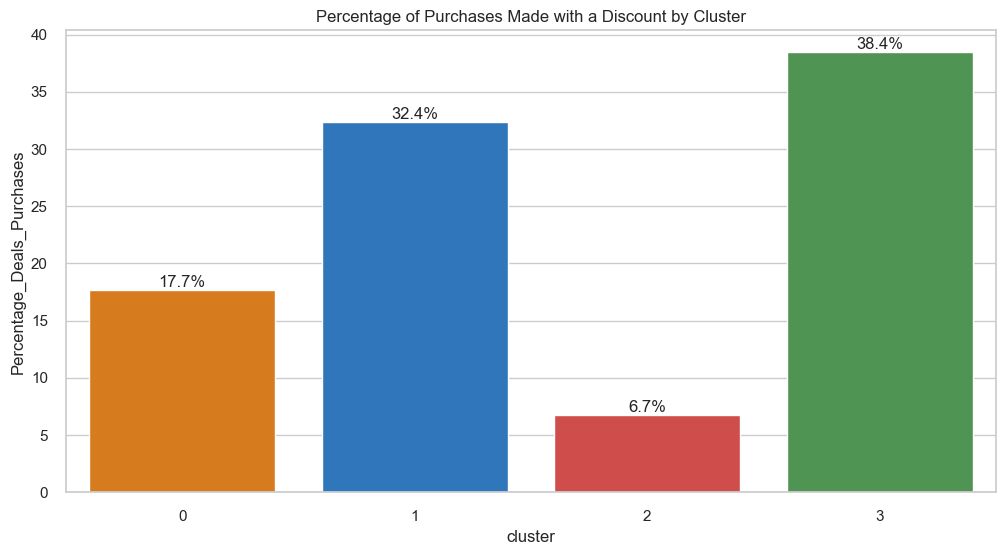

In [45]:
# Percentage of purchases made with discounts for each cluster
# Create a barplot

# Aggregate the data by cluster and sum the NumDealsPurchases and Total_Purchases columns
agg_data = df.groupby('cluster')[['DealsPurchases', 'Total_Purchases']].sum().reset_index()
     
# Calculate the percentage of purchases made with a discount for each cluster
agg_data['Percentage_Deals_Purchases'] = (agg_data['DealsPurchases'] / agg_data['Total_Purchases']) * 100
     
# Create the barplot with percentage of purchases made with a discount for each cluster
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="cluster", y="Percentage_Deals_Purchases", data=agg_data, palette=mycolormap)
ax.set_title("Percentage of Purchases Made with a Discount by Cluster")
     
for i, row in agg_data.iterrows():
    label = "{:.1f}%".format(row['Percentage_Deals_Purchases']) # format label as percentage with 1 decimal place
    ax.annotate(label, (i, row['Percentage_Deals_Purchases']), ha='center', va='bottom', fontsize=12)
     
plt.show()

Insights: Number of deals purchased with a discount and Percentage of purchases made with discounts for each cluster

There is a relationship between customers' income levels and their responsiveness to discounts. Cluster 2, with the lowest average income, has the highest percentage of purchases made with discounts (38.6%). In contrast, Cluster 1, with the highest average income, has the lowest rate of purchases made with discounts (6.8%). This suggests that lower-income customers are more sensitive to price and are more likely to respond to discount offers.

The marketing team should consider segmenting promotions based on the identified patterns. For higher-income customers (Cluster 1 and Cluster 0), focus on promo campaigns on premium products. For lower-income customers (Cluster 2 and potentially Cluster 3), focus on offering more deals and affordable options to incentivize spending.

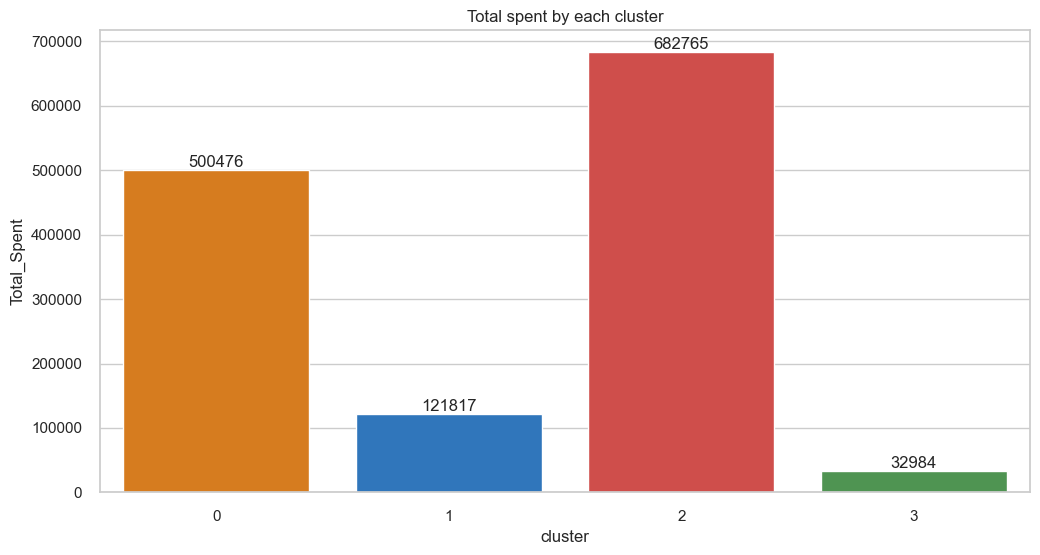

In [46]:
# Total spend by each cluster
# Create a barplot

# Aggregate the data by cluster and get total spent by each cluster
agg_data = df.groupby('cluster')['Total_Spent'].sum().reset_index()
     
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="cluster", y="Total_Spent", data=agg_data, palette=mycolormap)
ax.set_title("Total spent by each cluster")
     
# Add labels to the bars
for i, row in agg_data.iterrows():
    ax.annotate(f"{row['Total_Spent']}", (i, row['Total_Spent']), ha='center', va='bottom', fontsize=12)
     
plt.show()

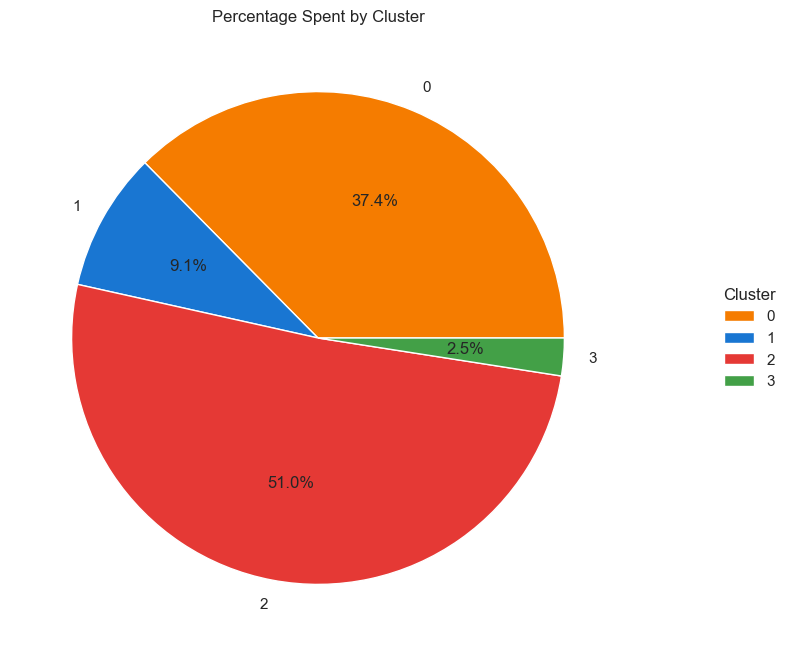

In [47]:
# Percentage spent by each cluster from the total spent in the store
# Create a piechart

# Aggregate the data by cluster and get the total spent by each cluster
agg_data = df.groupby('cluster')['Total_Spent'].sum().reset_index()
     
# Calculate the percentage spent for each cluster
agg_data['Percentage_Spent'] = agg_data['Total_Spent'] / agg_data['Total_Spent'].sum() * 100
     
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(agg_data['Percentage_Spent'], labels=agg_data['cluster'], autopct='%1.1f%%', colors=mycolormap)
plt.title('Percentage Spent by Cluster')
     
#Create legend
plt.legend(agg_data['cluster'], title='Cluster', loc='center', bbox_to_anchor=(1.2, 0.5))
     
plt.show()

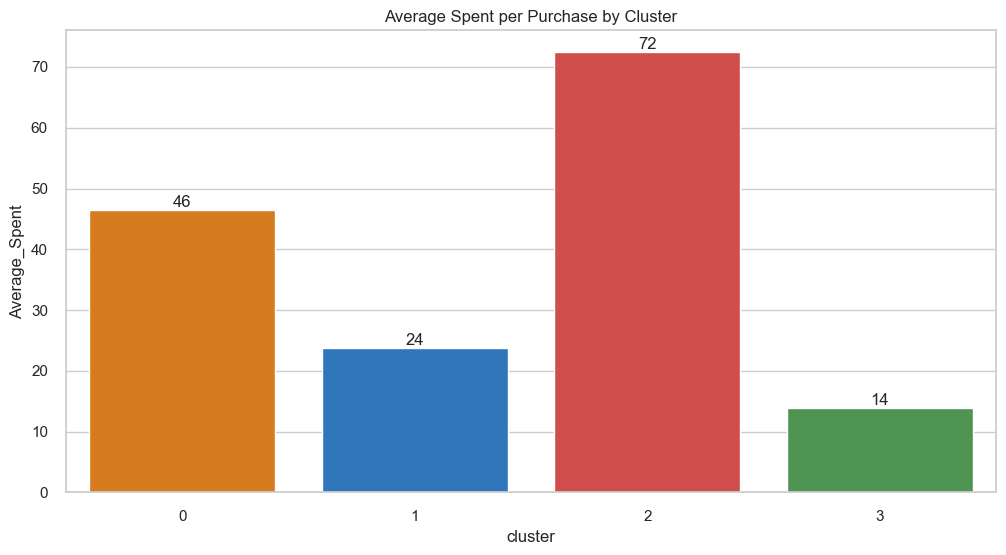

In [49]:
# Average spent per purchase by cluster
# Create a barplot
# Aggregate the data by cluster and get average spent per purchase by cluster
agg_data = df.groupby('cluster')[['Total_Spent', 'Total_Purchases']].sum().reset_index()
     
# Calculate the average Spent per purchase for each cluster
agg_data['Average_Spent'] = agg_data['Total_Spent'] / agg_data['Total_Purchases']
     
# Create the barplot with average Spent per purchase for each cluster
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="cluster", y="Average_Spent", data=agg_data, palette=mycolormap)
ax.set_title("Average Spent per Purchase by Cluster")
     
for i, row in agg_data.iterrows():
    label = "{:.0f}".format(row['Average_Spent']) # format label as percentage with 1 decimal place
    ax.annotate(label, (i, row['Average_Spent']), ha='center', va='bottom', fontsize=12)
plt.show()

Insights: Total Spent by each cluster, Percentage Spent for each cluster from the total Spent in the store, and Average Spent per purchase by cluster insights.

The total Spent data highlights significant differences between the clusters, with Cluster 1 and  0 accounting for 86.5% of the total Spent. It is interesting to note that Cluster 1 has a much higher average Spent per customer (almost 2x) compared to Cluster 0, contributing to 52.1% of the total Spent. This suggests that customers in Cluster 1 are more valuable in revenue generation and are more likely to accept promotions. Therefore, they are ideal customers for the store.

In [ ]:
Percentage of purchases for each cluster by the place of purchase

Create a barplot


    # Channels
    channel = ['Web', 'Catalog', 'Store']
     
    # Aggregate the acceptance data by cluster
    agg_data = campaign_data.groupby('cluster')[channel].sum().reset_index()
     
    # Calculate the percentage of purchases coming from each channel for each cluster
    agg_data[channel] = agg_data[channel].div(agg_data[channel].sum(axis=1), axis=0) * 100
     
    # Melt the aggregated data to make it suitable for plotting with seaborn
    melted_data = pd.melt(agg_data, id_vars='cluster', value_vars=channel,
                          var_name='Channel', value_name='Percentage_Purchases')
     
    # Create the barplot with cluster hue
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x="Channel", y="Percentage_Purchases", hue="cluster", data=melted_data, palette=mycolormap)
    ax.set_title("Percentage of Purchases by Cluster for Each Channel")
     
    # Add value labels to the bars
    for i, p in enumerate(ax.patches):
        value = agg_data.iloc[int(i/3), int(i%3)+1].round(1).astype(str) + '%'
        ax.annotate(value, (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom', fontsize=12)
     
     
    plt.show()

Insights: Percentage of purchases for each cluster by the place of purchase

Cluster 3 and Cluster 4 exhibit a higher percentage of web channel purchases (38.7% and 36.6%, respectively) compared to Cluster 1 (27.3%) and Cluster 0 (33.6%). On the other hand, Cluster 1 has the highest percentage of catalog purchases at 29.8%, followed by Cluster 0 at 20.3%.

Store purchases are the most common channel for all clusters, with Cluster 2 having the highest percentage of in-store purchases at 54.8%. Cluster 3 and Cluster 0 follow closely with 49.5% and 46%, respectively, while Cluster 1 has the lowest store purchase percentage at 42.9%.

It is worth noting that the more buying power customers have, the less likely they are to purchase in-store. Therefore, if the marketing team wants to increase promotion acceptance and revenue for the store, they should focus on offering campaigns through the catalog.